# forest fires.csv

In [1]:
!pip install keras
!pip install tensorflow
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('forestfires.csv')
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [4]:
#scaling the numerical data( leaving the target variable )
df1=df.iloc[:,2:30]
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_norm=sc.fit_transform(df1)
df_norm

array([[-8.05959472e-01, -1.32332557e+00, -1.83047676e+00, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [-8.10203395e-03, -1.17954077e+00,  4.88890915e-01, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       [-8.10203395e-03, -1.04982188e+00,  5.60715454e-01, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       ...,
       [-1.64008316e+00, -8.46647711e-01,  4.74768113e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [ 6.80956663e-01,  5.49002541e-01,  2.69382214e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [-2.02087875e+00, -1.68591332e+00, -1.78044169e+00, ...,
         2.27156334e+01, -1.72859706e-01, -7.06081245e-01]])

# PCA

In [5]:
from sklearn.decomposition import PCA
pca=PCA(n_components=28)
pca_values=pca.fit_transform(df_norm)
pca_values

array([[ 3.76670947e+00, -1.32025451e+00, -8.43971398e-01, ...,
        -6.53345819e-02,  4.98037274e-16, -2.73530281e-16],
       [ 3.90786263e-01,  8.31061522e-01, -1.10136513e+00, ...,
         3.42618601e-02, -9.55928328e-15,  1.15055466e-15],
       [ 6.90415596e-01,  1.17774562e+00, -1.22199841e+00, ...,
         2.63235187e-02,  2.58690766e-15, -5.66797432e-17],
       ...,
       [ 9.21634000e-01, -2.64543072e-01,  2.71921606e+00, ...,
        -2.97865814e-01, -1.84247930e-16,  2.36645381e-16],
       [-1.62054896e+00, -9.78838231e-01,  3.31987355e-01, ...,
         3.91949863e-02, -2.30354869e-16,  2.72058887e-16],
       [ 4.07590654e+00, -3.67440726e-01, -2.47151775e-01, ...,
        -2.50420726e-02,  5.70142521e-17,  8.50237385e-17]])

In [6]:
var=pca.explained_variance_ratio_
var

array([1.35522746e-01, 6.85788793e-02, 6.23572652e-02, 5.32713255e-02,
       4.75942360e-02, 4.68009902e-02, 4.37490015e-02, 4.28025164e-02,
       4.08875728e-02, 4.01633268e-02, 3.92926854e-02, 3.83232321e-02,
       3.64221503e-02, 3.63217289e-02, 3.57856782e-02, 3.50087806e-02,
       3.35447704e-02, 3.24777366e-02, 3.04490902e-02, 3.00246758e-02,
       2.37167400e-02, 2.08329788e-02, 1.18357869e-02, 8.88449559e-03,
       4.55347471e-03, 7.98135931e-04, 2.67271490e-32, 1.95971390e-33])

In [10]:
var=pca.explained_variance_ratio_
var

array([1.35522746e-01, 6.85788793e-02, 6.23572652e-02, 5.32713255e-02,
       4.75942360e-02, 4.68009902e-02, 4.37490015e-02, 4.28025164e-02,
       4.08875728e-02, 4.01633268e-02, 3.92926854e-02, 3.83232321e-02,
       3.64221503e-02, 3.63217289e-02, 3.57856782e-02, 3.50087806e-02,
       3.35447704e-02, 3.24777366e-02, 3.04490902e-02, 3.00246758e-02,
       2.37167400e-02, 2.08329788e-02, 1.18357869e-02, 8.88449559e-03,
       4.55347471e-03, 7.98135931e-04, 2.67271490e-32, 1.95971390e-33])

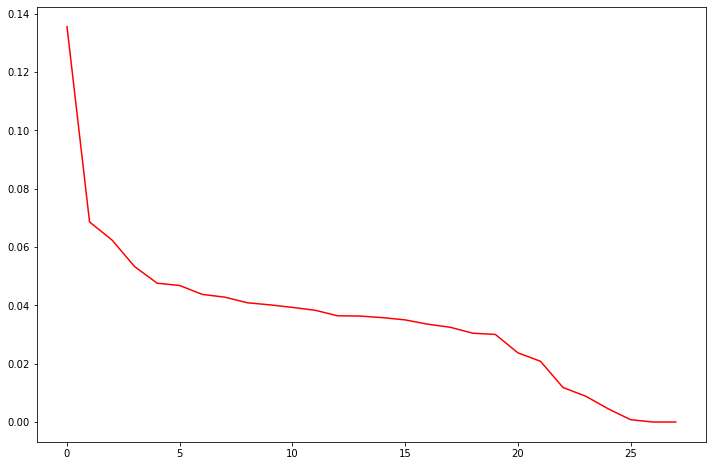

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(var,color='red')

In [12]:
finaldf=pd.concat([pd.DataFrame(pca_values[:,0:24],columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7',
                                                             'pc8','pc9','pc10','pc11','pc12','pc13','pc14',
                                                             'pc15','pc16','pc17','pc18','pc19','pc20','pc21',
                                                             'pc22','pc23','pc24']),
                 df[['size_category']]], axis = 1)
finaldf.size_category.replace(('large','small'),(1,0),inplace=True)
finaldf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,...,pc16,pc17,pc18,pc19,pc20,pc21,pc22,pc23,pc24,size_category
0,3.766709,-1.320255,-0.843971,-1.994738,-1.453359,0.693985,0.308104,-0.019764,0.010161,-0.437314,...,-0.197543,-0.021839,0.688958,0.563603,-0.439596,-0.926619,-0.405425,-0.118719,-0.017933,0
1,0.390786,0.831062,-1.101365,1.400671,2.869388,0.965898,-2.795574,0.041095,-0.548879,0.104500,...,-2.503167,0.499649,0.563706,-0.703319,-1.535718,-0.892995,0.836590,0.204975,0.290771,0
2,0.690416,1.177746,-1.221998,2.442038,1.090630,0.390801,-1.586675,-2.159336,-0.090580,0.260888,...,-2.545144,-0.658411,-0.423618,0.860550,-1.195230,-0.297870,0.743648,0.081757,0.345915,0
3,3.359951,-1.161443,0.385728,-2.118328,-1.949601,1.027664,-0.179422,-0.250227,-0.620329,-1.343189,...,-0.040887,0.017843,0.332572,1.164745,-1.632741,-0.817618,1.523710,-0.342302,-0.378420,0
4,2.974329,-0.842626,1.327788,0.038086,-1.124763,-0.574676,-0.777155,0.303635,0.861126,-2.024719,...,0.844431,1.014944,-0.618231,0.822853,-1.794109,-0.723371,2.020419,-0.545591,0.161735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,-0.087560,0.153964,1.241810,1.536581,0.372425,-1.133422,-0.362287,0.766946,0.818745,-0.289632,...,0.300522,0.513876,0.539642,-0.052958,1.898628,-1.441786,-0.821192,-1.205707,-0.698666,1
513,0.794366,-0.083966,2.670485,0.284995,0.223323,-0.904232,-0.014849,0.107226,1.340049,-0.147246,...,0.342367,0.485571,0.580150,0.384984,0.086251,-0.970693,-1.353365,-1.254890,-1.212175,1
514,0.921634,-0.264543,2.719216,-0.019643,0.242195,-0.966939,-0.118080,0.123010,1.290364,-0.177553,...,0.332816,0.344047,0.122409,0.313948,0.211157,-0.777731,-1.736711,-1.154127,-1.230040,1
515,-1.620549,-0.978838,0.331987,1.256638,-0.408164,0.735698,0.815510,-1.398344,0.076379,-0.005814,...,-0.011739,-1.035533,-0.774382,-0.216315,0.515791,0.080575,-0.055548,-0.067502,-0.311027,0


In [13]:
#split the data into x and y
array=finaldf.values
x=array[:,0:24]
y=array[:,24]

# iteration 1

In [15]:
# create model
model=Sequential()
model.add(Dense(12,input_dim=24,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(x,y, validation_split=0.3,epochs=150,batch_size=10)

Epoch 1/150
37/37 [==============================] - 2s 17ms/step - loss: 0.6820 - accuracy: 0.5449 - val_loss: 0.6824 - val_accuracy: 0.6410
Epoch 2/150
37/37 [==============================] - 0s 3ms/step - loss: 0.6088 - accuracy: 0.7484 - val_loss: 0.6787 - val_accuracy: 0.6667
Epoch 3/150
37/37 [==============================] - 0s 3ms/step - loss: 0.6051 - accuracy: 0.7363 - val_loss: 0.6770 - val_accuracy: 0.6410
Epoch 4/150
37/37 [==============================] - 0s 3ms/step - loss: 0.5938 - accuracy: 0.7695 - val_loss: 0.6789 - val_accuracy: 0.6667
Epoch 5/150
37/37 [==============================] - 0s 2ms/step - loss: 0.5693 - accuracy: 0.7682 - val_loss: 0.6812 - val_accuracy: 0.6603
Epoch 6/150
37/37 [==============================] - 0s 3ms/step - loss: 0.5531 - accuracy: 0.7537 - val_loss: 0.6814 - val_accuracy: 0.6603
Epoch 7/150
37/37 [==============================] - 0s 3ms/step - loss: 0.5469 - accuracy: 0.7911 - val_loss: 0.6868 - val_accuracy: 0.6603
Epoch 8/150


In [18]:
#accuracy of model
scores=model.evaluate(x,y)

17/17 [==============================] - 0s 2ms/step - loss: 0.3335 - accuracy: 0.9362


In [19]:
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 93.62%


# iteration 2¶

In [20]:
model1=Sequential()
model1.add(Dense(12,input_dim=24,activation='sigmoid'))
model1.add(Dense(8,activation='sigmoid'))
model1.add(Dense(1,activation='relu'))
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model1.fit(x, y, validation_split=0.3, epochs=100, batch_size=15)

Epoch 1/100
25/25 [==============================] - 2s 19ms/step - loss: 0.5921 - accuracy: 0.7266 - val_loss: 0.6636 - val_accuracy: 0.6731
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5327 - accuracy: 0.7699 - val_loss: 0.6679 - val_accuracy: 0.6731
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.5587 - accuracy: 0.7468 - val_loss: 0.6627 - val_accuracy: 0.6731
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.5272 - accuracy: 0.7686 - val_loss: 0.6620 - val_accuracy: 0.6731
Epoch 5/100
25/25 [==============================] - 0s 6ms/step - loss: 0.5530 - accuracy: 0.7384 - val_loss: 0.6622 - val_accuracy: 0.6731
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.5200 - accuracy: 0.7599 - val_loss: 0.6653 - val_accuracy: 0.6731
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5067 - accuracy: 0.7796 - val_loss: 0.6542 - val_accuracy: 0.6731
Epoch 8/100


In [22]:
#model accuracy
scores1=model1.evaluate(x,y)
print("%s: %.2f%%" % (model1.metrics_names[1], scores1[1]*100))

17/17 [==============================] - 0s 2ms/step - loss: 0.4196 - accuracy: 0.8665
accuracy: 86.65%


# iteration 3¶

In [23]:
model2=Sequential()
model2.add(Dense(12,input_dim=24,activation='relu'))
model2.add(Dense(8,activation='relu'))
model2.add(Dense(1,activation='relu'))
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model2.fit(x,y,epochs=100, validation_split=0.3,batch_size=15)

Epoch 1/100
25/25 [==============================] - 2s 17ms/step - loss: 2.8283 - accuracy: 0.7567 - val_loss: 3.9024 - val_accuracy: 0.6474
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 2.8919 - accuracy: 0.7536 - val_loss: 3.8223 - val_accuracy: 0.6538
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 2.6189 - accuracy: 0.7580 - val_loss: 3.5952 - val_accuracy: 0.6538
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 2.8685 - accuracy: 0.7399 - val_loss: 3.5546 - val_accuracy: 0.6538
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 2.2117 - accuracy: 0.7662 - val_loss: 3.5504 - val_accuracy: 0.6474
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 2.4181 - accuracy: 0.7531 - val_loss: 3.5649 - val_accuracy: 0.6474
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 2.5065 - accuracy: 0.7414 - val_loss: 3.7108 - val_accuracy: 0.6474
Epoch 8/100


In [24]:
#model accuracy
scores2=model2.evaluate(x,y)
print("%s: %.2f%%" % (model2.metrics_names[1], scores2[1]*100))

17/17 [==============================] - 0s 2ms/step - loss: 2.0514 - accuracy: 0.7872
accuracy: 78.72%


# iteration 4

In [25]:
model3=Sequential()
model3.add(Dense(12,input_dim=24,activation='relu'))
model3.add(Dense(8,activation='relu'))
model3.add(Dense(1,activation='relu'))
model3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model3.fit(x,y,epochs=150, validation_split=0.3,batch_size=10)

Epoch 1/150
37/37 [==============================] - 2s 12ms/step - loss: 3.5796 - accuracy: 0.7629 - val_loss: 4.7912 - val_accuracy: 0.6667
Epoch 2/150
37/37 [==============================] - 0s 3ms/step - loss: 3.7158 - accuracy: 0.7498 - val_loss: 4.7960 - val_accuracy: 0.6667
Epoch 3/150
37/37 [==============================] - 0s 3ms/step - loss: 3.2119 - accuracy: 0.7781 - val_loss: 4.7985 - val_accuracy: 0.6667
Epoch 4/150
37/37 [==============================] - 0s 3ms/step - loss: 3.9571 - accuracy: 0.7328 - val_loss: 4.7946 - val_accuracy: 0.6667
Epoch 5/150
37/37 [==============================] - 0s 3ms/step - loss: 3.6990 - accuracy: 0.7487 - val_loss: 4.7983 - val_accuracy: 0.6667
Epoch 6/150
37/37 [==============================] - 0s 3ms/step - loss: 3.8625 - accuracy: 0.7418 - val_loss: 4.7981 - val_accuracy: 0.6667
Epoch 7/150
37/37 [==============================] - 0s 4ms/step - loss: 3.9519 - accuracy: 0.7416 - val_loss: 4.7934 - val_accuracy: 0.6667
Epoch 8/150


In [26]:
scores3 = model3.evaluate(x, y)
print("%s: %.2f%%" % (model3.metrics_names[1], scores3[1]*100))

17/17 [==============================] - 0s 1ms/step - loss: 2.1458 - accuracy: 0.8104
accuracy: 81.04%


In [ ]:
# hence here we can analyse that the best of all iteration is first one where accuracy of the system came as 92.65%

# gas_turbines.csv

In [2]:
import pandas as pd
import numpy as np
#Plot Tools
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#Model Building
from sklearn.preprocessing import StandardScaler
import sklearn
import keras
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import InputLayer,Dense
import tensorflow as tf
#Model Validation
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
data=pd.read_csv('gas_turbines.csv')
data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [5]:

data.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [6]:
X = data.loc[:,['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO','NOX']]
y= data.loc[:,['TEY']]

In [7]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

In [8]:
def baseline_model():
    model = Sequential()
    model.add(Dense(10, input_dim=10, activation='tanh'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [9]:
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=50, batch_size=100, verbose=False)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, X, y, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Results: -0.21 (0.14) MSE


In [10]:
estimator.fit(X, y)
prediction = estimator.predict(X)

In [ ]:
prediction

In [11]:
a=scaler.inverse_transform(prediction)
a

array([122.48248, 122.25984, 122.1758 , ..., 116.89626, 118.73088,
       119.73915], dtype=float32)

In [12]:
b=scaler.inverse_transform(y)
b

array([[114.7 ],
       [114.72],
       [114.71],
       ...,
       [110.19],
       [110.74],
       [111.58]])

In [13]:
mean_squared_error(b,a)

13.727745526500795

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [15]:
estimator.fit(X_train, y_train)
prediction = estimator.predict(X_test)

In [16]:

prediction

array([ 0.49071008,  1.2907953 ,  0.15385179, ..., -1.4284554 ,
        0.10786632,  1.0205607 ], dtype=float32)

In [17]:
c=scaler.inverse_transform(prediction)

In [18]:
d=scaler.inverse_transform(y_test)

In [19]:
mean_squared_error(d,c)

25.04630708361525